```
[Title] Multivariate - PCA
[Author] Yibeck Lee(yibec.Lee@gmail.com)
[Contents] 
 - PCA for FDC Parameters
```

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
import pandas as pd
df = pd.read_csv("../data_source/WiP_HISTORY.csv")
df.corr(method='pearson')

,TARGET_VALUE,GOOD_BAD,LINE,EQUIPMENT,GAS_PRESSURE,TEMPERATURE,THICKNESS,WAITING_TIME,PROCESS_TIME,INTENSITY,RPM,TIME_GAP,SPEED
TARGET_VALUE,1.000000,0.223602,0.096372,0.153725,-0.062426,0.048766,0.372615,0.349891,0.022198,0.309442,0.202264,-0.337871,0.428800
GOOD_BAD,0.223602,1.000000,0.016785,0.305362,0.132977,0.156108,-0.161578,0.124836,0.268108,0.350427,0.224023,-0.094647,0.295190
LINE,0.096372,0.016785,1.000000,0.400012,-0.092977,0.027118,0.059429,-0.045650,0.029234,0.008407,0.074723,-0.064829,0.157965
EQUIPMENT,0.153725,0.305362,0.400012,1.000000,-0.025965,0.066396,0.002282,-0.009131,0.096855,0.153023,0.145782,-0.069336,0.208958
GAS_PRESSURE,-0.062426,0.132977,-0.092977,-0.025965,1.000000,-0.088498,-0.066479,-0.116885,0.018620,-0.110673,-0.140616,-0.040707,0.016965
TEMPERATURE,0.048766,0.156108,0.027118,0.066396,-0.088498,1.000000,0.000777,0.052813,0.054029,0.080717,0.031755,0.023435,0.041930
THICKNESS,0.372615,-0.161578,0.059429,0.002282,-0.066479,0.000777,1.000000,0.040017,-0.031659,-0.042260,-0.002660,0.008198,-0.038761
WAITING_TIME,0.349891,0.124836,-0.045650,-0.009131,-0.116885,0.052813,0.040017,1.000000,-0.098425,0.105935,-0.005850,0.111746,0.014293
PROCESS_TIME,0.022198,0.268108,0.029234,0.096855,0.018620,0.054029,-0.031659,-0.098425,1.000000,0.065897,0.043476,-0.012613,0.085077
INTENSITY,0.309442,0.350427,0.008407,0.153023,-0.110673,0.080717,-0.042260,0.105935,0.065897,1.000000,0.149603,0.006070,0.138085


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


array([[80952,  9582],
       [75331,  9324],
       [78700,  9346],
       ...,
       [87380,  9585],
       [78485,  8824],
       [72473,  8994]], dtype=int64)

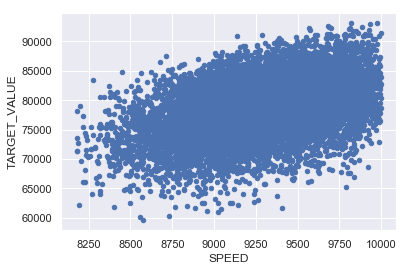

In [3]:
df1 = df[['TARGET_VALUE','SPEED']]
df1.plot.scatter(x='SPEED', y='TARGET_VALUE')
arrDf1 = df1.values
arrDf1

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # 주성분을 몇개로
pca.fit(arrDf1)
print('[pca.component]')
print(pca.components_)
print('\n[pda.explained_variance_]')
print(pca.explained_variance_)

[pca.component]
[[-0.99951557 -0.03112273]
 [ 0.03112273 -0.99951557]]

[pda.explained_variance_]
[24257579.98813485   103306.10279941]


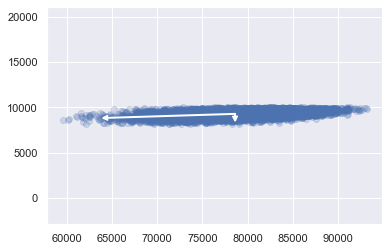

In [49]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
arrDf1[:,0]
# plot data
plt.scatter(arrDf1[:, 0], arrDf1[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');